<a href="https://colab.research.google.com/github/111Vidya/DS-Assignments/blob/main/Assignment_Support_Vector_Machines(Salary_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
train=pd.read_csv("SalaryData_Train(1).csv")
test=pd.read_csv("SalaryData_Test(1).csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [ ]:
train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [ ]:
train.shape

(30161, 14)

In [ ]:
test.shape

(15060, 14)

In [ ]:
train[train.duplicated()].shape

(3258, 14)

In [ ]:
train[train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [ ]:
train=train.drop_duplicates()
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,Private,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
30155,22,Private,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [ ]:
test[test.duplicated()].shape

(930, 14)

In [ ]:
test[test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [ ]:
test=test.drop_duplicates()
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [ ]:
train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

In [ ]:
test['Salary'].value_counts()

 <=50K    10620
 >50K      3510
Name: Salary, dtype: int64

Text(0, 0.5, 'count')

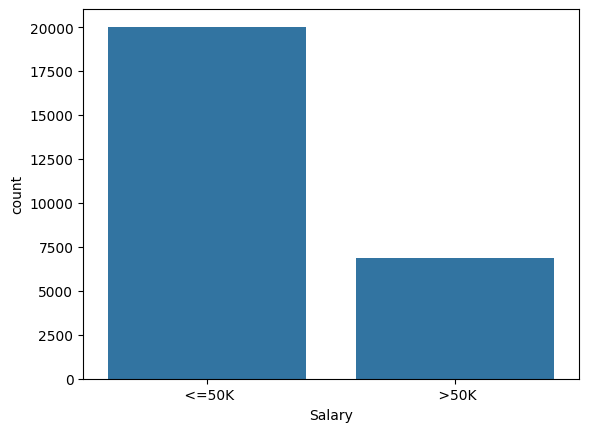

In [ ]:
sns.countplot(x='Salary',data= train)
plt.xlabel('Salary')
plt.ylabel('count')

Text(0, 0.5, 'count')

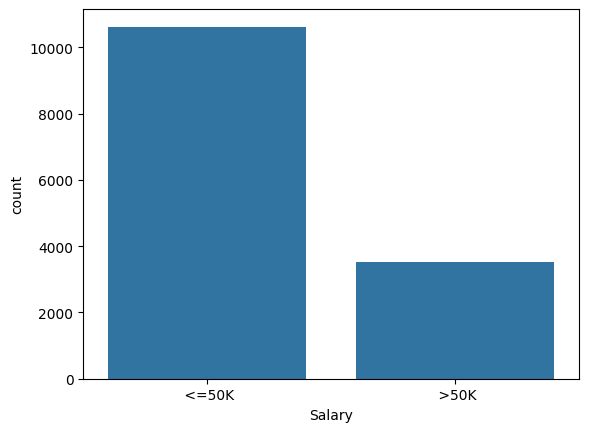

In [ ]:
sns.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')

In [ ]:
train['maritalstatus'].value_counts()

 Married-civ-spouse       12371
 Never-married             8387
 Divorced                  4009
 Separated                  928
 Widowed                    817
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [ ]:
test['maritalstatus'].value_counts()

 Married-civ-spouse       6490
 Never-married            4501
 Divorced                 2026
 Separated                 470
 Widowed                   450
 Married-spouse-absent     182
 Married-AF-spouse          11
Name: maritalstatus, dtype: int64

Text(0, 0.5, 'count')

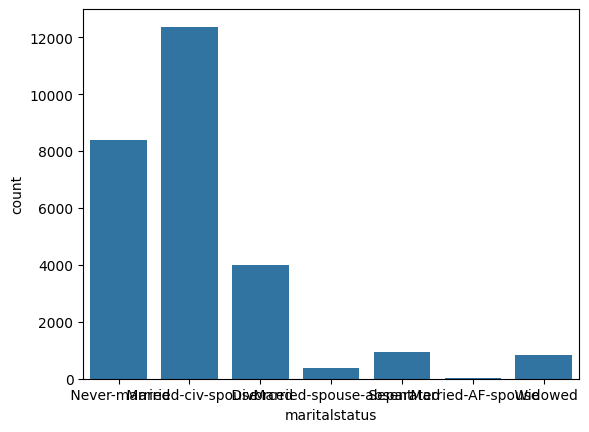

In [ ]:
sns.countplot(x='maritalstatus',data= train)
plt.xlabel('maritalstatus')
plt.ylabel('count')

In [ ]:
pd.crosstab(train['occupation'],train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


In [ ]:
pd.crosstab(train['education'],train['Salary'])

Salary,<=50K,>50K
education,,
10th,714,56
11th,882,59
12th,329,29
1st-4th,143,6
5th-6th,271,12
7th-8th,506,35
9th,424,25
Assoc-acdm,739,255
Assoc-voc,923,333


In [ ]:
pd.crosstab(train['workclass'],train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


<Axes: xlabel='education'>

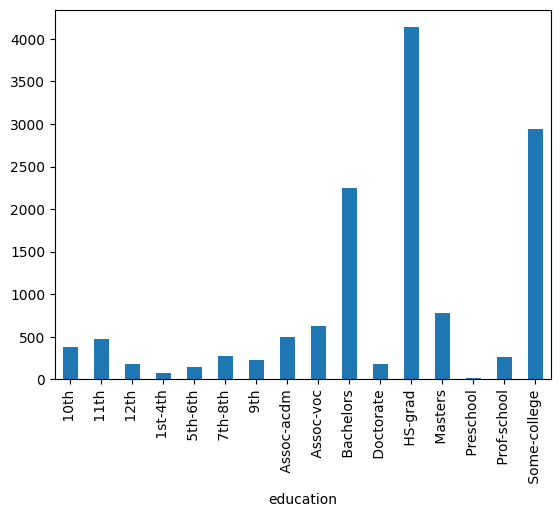

In [ ]:
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

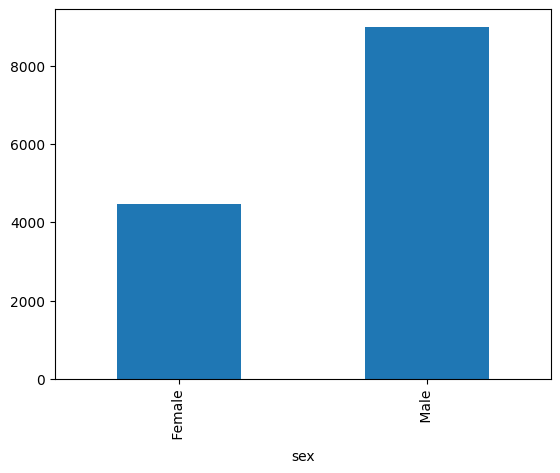

In [ ]:
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')

<Axes: xlabel='occupation'>

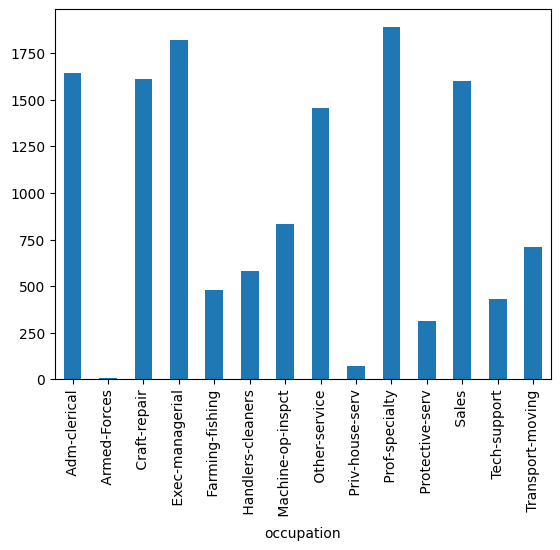

In [ ]:
pd.crosstab(train['Salary'],train['occupation']).mean().plot(kind='bar')

<Axes: xlabel='workclass'>

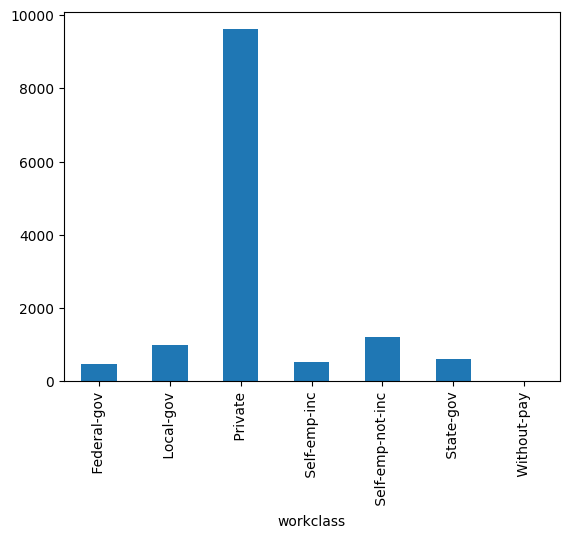

In [ ]:
pd.crosstab(train['Salary'],train['workclass']).mean().plot(kind='bar')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [ ]:
label_encoder = preprocessing.LabelEncoder()
train['workclass']=label_encoder.fit_transform(train['workclass'])
train['education']=label_encoder.fit_transform(train['education'])
train['maritalstatus']=label_encoder.fit_transform(train['maritalstatus'])
train['occupation']=label_encoder.fit_transform(train['occupation'])
train['relationship']=label_encoder.fit_transform(train['relationship'])
train['race']=label_encoder.fit_transform(train['race'])
train['sex']=label_encoder.fit_transform(train['sex'])
train['native']=label_encoder.fit_transform(train['native'])
train['Salary']=label_encoder.fit_transform(train['Salary'])
test['workclass']=label_encoder.fit_transform(test['workclass'])
test['education']=label_encoder.fit_transform(test['education'])
test['maritalstatus']=label_encoder.fit_transform(test['maritalstatus'])
test['occupation']=label_encoder.fit_transform(test['occupation'])
test['relationship']=label_encoder.fit_transform(test['relationship'])
test['race']=label_encoder.fit_transform(test['race'])
test['sex']=label_encoder.fit_transform(test['sex'])
test['native']=label_encoder.fit_transform(test['native'])
test['Salary']=label_encoder.fit_transform(test['Salary'])

<ipython-input-33-b923d09815fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['workclass']=label_encoder.fit_transform(train['workclass'])
<ipython-input-33-b923d09815fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['education']=label_encoder.fit_transform(train['education'])
<ipython-input-33-b923d09815fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [ ]:
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [ ]:
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [ ]:
names = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native', 'Salary']
train.columns=names
test.columns=names

In [ ]:
x_train =train[names[0:13]].values
y_train = train[names[13]].values
x_test = test[names[0:13]].values
y_test = test[names[13]].values

In [ ]:
train['Salary']=pd.to_numeric(train['Salary'],errors='coerce')
train

<ipython-input-38-8338b951e27f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Salary']=pd.to_numeric(train['Salary'],errors='coerce')


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30154,53,2,12,14,2,3,0,4,1,0,0,40,37,1
30155,22,2,15,10,4,10,1,4,1,0,0,40,37,0
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0


In [ ]:
train['Salary'].value_counts()

0    20023
1     6880
Name: Salary, dtype: int64

In [ ]:
test['Salary'].value_counts()

0    10620
1     3510
Name: Salary, dtype: int64

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = svc.predict(x_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[10257   363]
 [ 2519   991]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     10620
           1       0.73      0.28      0.41      3510

    accuracy                           0.80     14130
   macro avg       0.77      0.62      0.64     14130
weighted avg       0.79      0.80      0.76     14130



In [ ]:
svc.score(x_train, y_train)

0.7940378396461362

In [ ]:
svc.score(x_test, y_test)

0.7960368011323425

In [ ]:
svc = SVC(C=2,gamma=0.01)
svc.fit(x_test,y_test)

SVC(C=2, gamma=0.01)

In [ ]:
y_pred=svc.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[10304   316]
 [ 1521  1989]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10620
           1       0.86      0.57      0.68      3510

    accuracy                           0.87     14130
   macro avg       0.87      0.77      0.80     14130
weighted avg       0.87      0.87      0.86     14130



In [ ]:
svc=SVC(C=3.0, kernel='rbf', gamma=0.01, random_state=10)
svc.fit(x_train,y_train)

SVC(C=3.0, gamma=0.01, random_state=10)

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[10304   316]
 [ 1521  1989]]


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     10620
           1       0.86      0.57      0.68      3510

    accuracy                           0.87     14130
   macro avg       0.87      0.77      0.80     14130
weighted avg       0.87      0.87      0.86     14130



Grid search function and other Kernal methods like poly and linear are not executing at all.